In [1]:
import tensorflow as tf

In [2]:
import tensorflow as tf

# Update the URL to the correct location
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip', # Updated URL
    fname='jena_climate_2009_2016.csv.zip',
    extract=True
)

In [3]:
import os
csv_path, _ = os.path.splitext(zip_path)
csv_path

'/root/.keras/datasets/jena_climate_2009_2016.csv'

In [4]:
with open(csv_path) as f:
    data= f.read()

In [5]:
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

In [6]:
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [7]:
import numpy as np
raw_data = np.zeros((len(lines), len(header) - 1))

In [8]:
temperature = np.zeros((len(lines)))
raw_data = np.zeros((len(lines), len(header) - 1))

for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    # Assign the first value in 'values' as the temperature (assuming it's the first column)
    temperature[i] = values[0]
    raw_data[i, :] = values[:]

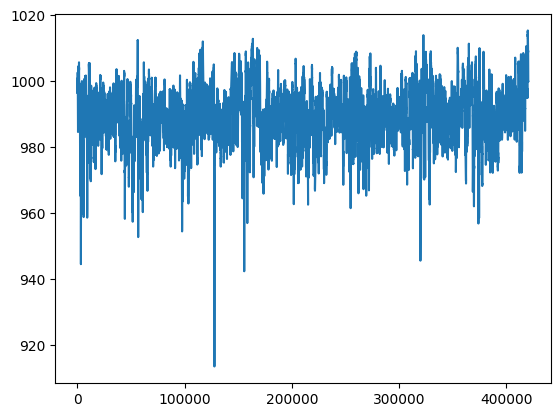

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(len(temperature)), temperature)
plt.show()
#

In [10]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples

In [11]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

In [12]:
int_sequence = np.arange(10)

In [13]:
dummy_dataset = tf.keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],  # Remove int()
    targets=int_sequence[3:], # Remove int()
    sequence_length=3,
    batch_size=2
)
for inputs, target in dummy_dataset:
    print(inputs.numpy())
    print(target.numpy())

[[0 1 2]
 [1 2 3]]
[3 4]
[[2 3 4]
 [3 4 5]]
[5 6]
[[4 5 6]]
[7]


In [14]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

In [15]:
train_dataset = tf.keras.utils.timeseries_dataset_from_array(
    data=raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    start_index=0,
    end_index=num_train_samples,
    batch_size=batch_size,
    drop_remainder=True
    )

TypeError: timeseries_dataset_from_array() got an unexpected keyword argument 'drop_remainder'

In [ ]:
val_dataset = tf.keras.utils.timeseries_dataset_from_array(
    data=raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    start_index=num_train_samples,
    end_index=num_train_samples+num_val_samples,

    )

In [ ]:
test_dataset = tf.keras.utils.timeseries_dataset_from_array(
    data=raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    start_index=num_train_samples+num_val_samples,



    )

In [ ]:
def naive_method(dataset):
    total_abs_error = 0.0
    samples_seen = 0

    for samples, target in dataset:
        if samples.shape[0] == 0:
            continue

        # Şekli kontrol edip gerekirse yeniden boyutlandır
        if len(samples.shape) == 2:
            samples = tf.expand_dims(samples, axis=-1)

        preds = samples[:, -1, 0]

        # target ile preds'in aynı şekle sahip olduğundan emin ol
        target = tf.reshape(target, preds.shape)

        total_abs_error += tf.reduce_sum(tf.abs(target - preds)).numpy()
        samples_seen += samples.shape[0]

    return total_abs_error / samples_seen if samples_seen > 0 else 0.0


In [16]:


import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

# ... (Veriyi indirme ve işleme bölümü aynı kalır) ...

# Zaman serisi veri setlerini oluşturma
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = tf.keras.utils.timeseries_dataset_from_array(
    data=raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    start_index=0,
    end_index=num_train_samples,
    # batch_size=batch_size,  # Remove this line
)
train_dataset = train_dataset.batch(batch_size, drop_remainder=True)  # Add this line


val_dataset = tf.keras.utils.timeseries_dataset_from_array(
    data=raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples,
    # batch_size=batch_size,  # Remove this line
)
val_dataset = val_dataset.batch(batch_size, drop_remainder=True)  # Add this line


# ... (Modeli oluşturma ve eğitme bölümü aynı kalır) ...

import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

# ... (Veriyi indirme ve işleme bölümü aynı kalır) ...

# Zaman serisi veri setlerini oluşturma
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = tf.keras.utils.timeseries_dataset_from_array(
    data=raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    start_index=0,
    end_index=num_train_samples,
    # batch_size=batch_size,  # Remove this line
)
train_dataset = train_dataset.batch(batch_size, drop_remainder=True)  # Add this line


val_dataset = tf.keras.utils.timeseries_dataset_from_array(
    data=raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples,
    # batch_size=batch_size,  # Remove this line
)
val_dataset = val_dataset.batch(batch_size, drop_remainder=True)  # Add this line


# ... (Modeli oluşturma ve eğitme bölümü aynı kalır) ...
inputs = tf.keras.Input(shape=(sequence_length, raw_data.shape[1]))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("jena_dense.keras", save_best_only=True)
]

history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=val_dataset,
    callbacks=callbacks
)

# Sonuçları görselleştirme
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.legend()
plt.show()

Epoch 1/10


ValueError: Exception encountered when calling Functional.call().

[1mInvalid input shape for input Tensor("functional_1/Cast:0", shape=(256, None, None, 14), dtype=float32). Expected shape (None, 120, 14), but input has incompatible shape (256, None, None, 14)[0m

Arguments received by Functional.call():
  • inputs=tf.Tensor(shape=(256, None, None, 14), dtype=float64)
  • training=True
  • mask=None